In [24]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\DELL\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [25]:
pip install glob2

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\DELL\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [26]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\DELL\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [27]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\DELL\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [28]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\DELL\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [29]:
import cv2
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
gen_sign = [glob.glob('Dataset_Signature_Final/Dataset/dataset1/real/*.*'),
            glob.glob('Dataset_Signature_Final/Dataset/dataset2/real/*.*'),
            glob.glob('Dataset_Signature_Final/Dataset/dataset3/real/*.*'),
            glob.glob('Dataset_Signature_Final/Dataset/dataset4/real/*.*')]

forg_sign = [glob.glob('Dataset_Signature_Final/Dataset/dataset1/forge/*.*'),
             glob.glob('Dataset_Signature_Final/Dataset/dataset2/forge/*.*'),
             glob.glob('Dataset_Signature_Final/Dataset/dataset3/forge/*.*'),
             glob.glob('Dataset_Signature_Final/Dataset/dataset4/forge/*.*')]

In [31]:
def load_images(file_list):
    images = []
    for files in file_list:
        for file in files:
            img = cv2.imread(file)
            images.append(img)
    return images

In [32]:
gen_imgs = load_images(gen_sign)
forg_imgs = load_images(forg_sign)

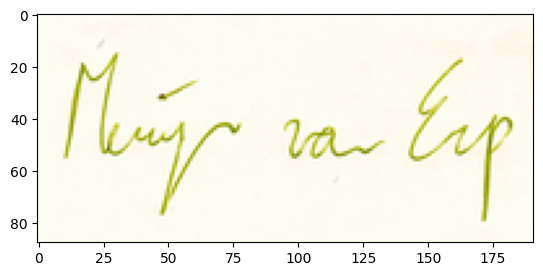

In [33]:
plt.imshow(gen_imgs[0])

In [34]:
plt.show()

In [35]:
gen_imgs[0].shape

(88, 191, 3)

In [36]:
num_gen = sum([len(x) for x in gen_sign])
num_forg = sum([len(x) for x in forg_sign])

In [37]:
print(f'Number of real signatures: {num_gen}')
print(f'Number of forged signatures: {num_forg}')



Number of real signatures: 360
Number of forged signatures: 360


In [38]:
gen_shape = [x.shape for x in gen_imgs]
forg_shape = [x.shape for x in forg_imgs]
print('Shape of real images: ', gen_shape[:5])
print('Shape of forged images: ', forg_shape[:5])


Shape of real images:  [(88, 191, 3), (90, 184, 3), (80, 202, 3), (90, 186, 3), (90, 194, 3)]
Shape of forged images:  [(83, 226, 3), (118, 223, 3), (91, 272, 3), (76, 161, 3), (83, 166, 3)]


In [39]:
gen_color = [x.shape[2] for x in gen_imgs]
forg_color = [x.shape[2] for x in forg_imgs]
print('Color channels of real images: ', gen_color[:5])
print('Color channels of forged images: ',forg_color[:5])


Color channels of real images:  [3, 3, 3, 3, 3]
Color channels of forged images:  [3, 3, 3, 3, 3]


In [40]:
gen_pixels = [x.mean() for x in gen_imgs]
forg_pixels = [x.mean() for x in forg_imgs]
print('Mean pixels values of real images: ',gen_pixels[:5])
print('Mean pixels value of forged images: ',forg_pixels[:5])

Mean pixels values of real images:  [242.76453672854197, 243.156038647343, 243.3089315181518, 243.03986459577857, 242.72010309278352]
Mean pixels value of forged images:  [242.45354870810675, 243.70669605533178, 243.68103587588882, 239.77849515092078, 243.47038757439395]


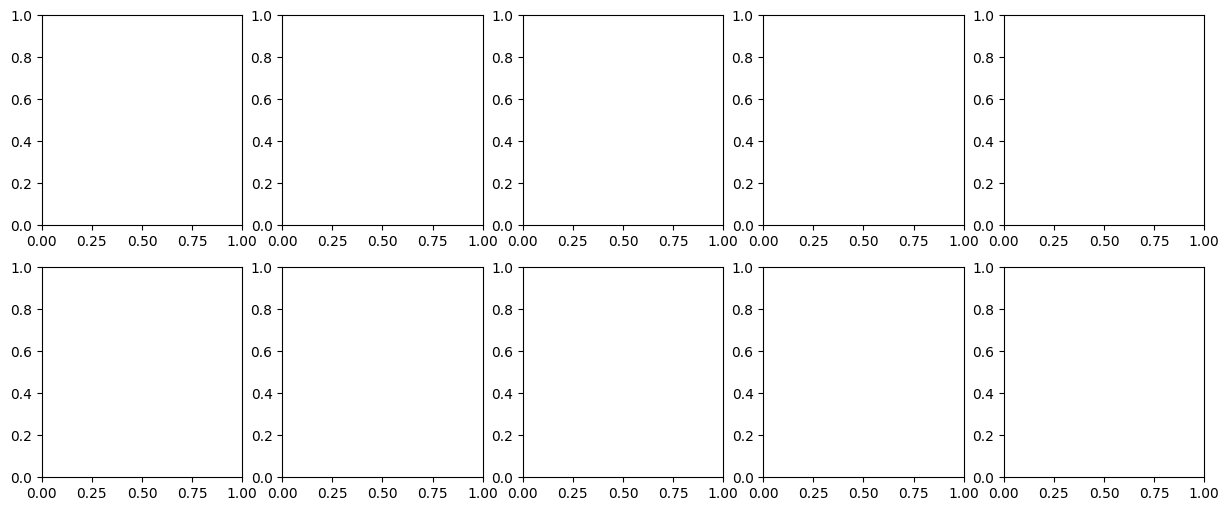

In [41]:
fig,ax = plt.subplots(2,5,figsize =(15,6))

In [42]:
for i in range(5):
    ax[0,i].imshow(cv2.cvtColor(gen_imgs[i],cv2.COLOR_BGR2RGB))
    ax[0,i].set_title('Real Signature')
    ax[0,i].axis('off')
    ax[1,i].imshow(cv2.cvtColor(forg_imgs[i],cv2.COLOR_BGR2RGB))
    ax[1,i].set_title('Forged Signature')
    ax[1,i].axis('off')
plt.show()

In [43]:
image_data = pd.DataFrame(columns=['Type','Shape','Color Channels','Mean Pixel Value'])

In [44]:
data_list = []
 
for i in range(len(gen_shape)):
    data_list.append({'Type': 'Real',
                      'Shape': gen_shape[i],
                      'Color Channels': gen_color[i],
                      'Mean Pixel Value': gen_pixels[i]})

In [45]:
for i in range(len(forg_shape)):
    data_list.append({'Type': 'Forged',
                      'Shape': forg_shape[i],
                      'Color Channels': forg_color[i],
                      'Mean Pixel Value': forg_pixels[i]})

In [46]:
image_data = pd.concat([image_data, pd.DataFrame(data_list)], ignore_index=True)
 
 
 
image_data.head()
 
image_data.tail()
 
image_data.shape
 
 
print(image_data.describe())


       Mean Pixel Value
count        720.000000
mean         243.039370
std            5.213333
min          226.423019
25%          239.804540
50%          242.563931
75%          247.552634
max          252.423212


C:\Users\DELL\AppData\Local\Temp\ipykernel_18212\4040040937.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  image_data = pd.concat([image_data, pd.DataFrame(data_list)], ignore_index=True)


<Axes: >

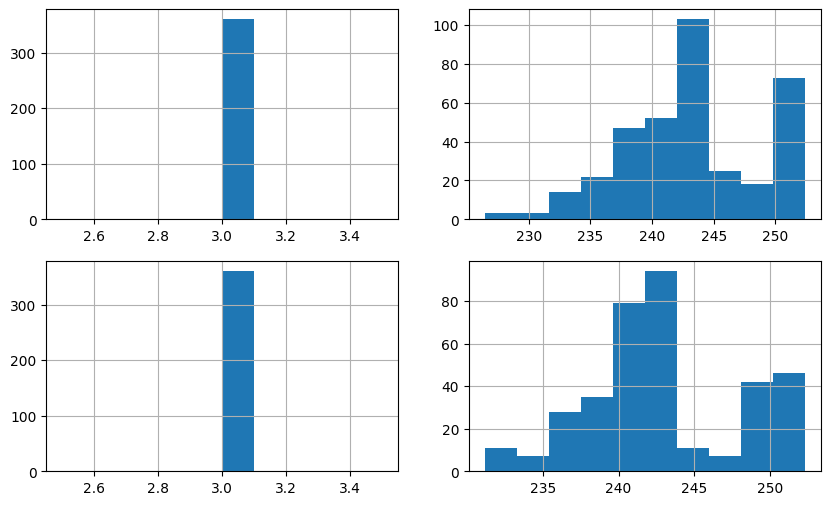

In [47]:
fig, ax = plt.subplots(2,2,figsize=(10,6))
image_data[image_data['Type']=='Real']['Color Channels'].hist(ax=ax[0,0])
image_data[image_data['Type']=='Forged']['Color Channels'].hist(ax=ax[1,0])
image_data[image_data['Type']=='Real']['Mean Pixel Value'].hist(ax=ax[0,1])
image_data[image_data['Type']=='Forged']['Mean Pixel Value'].hist(ax=ax[1,1])
 

In [48]:
ax[0,0].set_title('Color Channels of Real Signatures')
ax[0,1].set_title('Mean Pixel Value of Real Signatures')
ax[1,0].set_title('Color Channels of Forged Signatures')
ax[1,1].set_title('Mean Pixel Value of Forged Signatures')


Text(0.5, 1.0, 'Mean Pixel Value of Forged Signatures')

In [49]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [50]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\DELL\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [51]:
import tensorflow 
from tensorflow import keras
from keras import layers

In [52]:
(train_data, train_labels),(test_data, test_labels) = keras.datasets.mnist.load_data()

In [53]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [54]:
train_data = train_data.reshape((train_data.shape[0], train_data.shape[1], train_data.shape[2]*1))
test_data = test_data.reshape((test_data.shape[0], test_data.shape[1], test_data.shape[2]*1))
train_data = train_data.astype('float32')/255
test_data = test_data.astype('float32')/255

In [55]:
model = keras.Sequential([layers.LSTM(32,input_shape=(train_data.shape[1], train_data.shape[2])), layers.Dense(10, activation='softmax')])

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [56]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [57]:
model.save('rnn_signature_verification_model.h5')

In [58]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 32)             │         7,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,138 (31.79 KB)

 Trainable params: 8,138 (31.79 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss',patience=3)

In [60]:
history = model.fit(train_data, train_labels, batch_size=32,
                    epochs=10, validation_split=0.2,callbacks=[early_stop])

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5887 - loss: 1.2522 - val_accuracy: 0.8967 - val_loss: 0.3492
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9044 - loss: 0.3181 - val_accuracy: 0.9399 - val_loss: 0.2015
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9406 - loss: 0.2015 - val_accuracy: 0.9530 - val_loss: 0.1628
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9528 - loss: 0.1595 - val_accuracy: 0.9605 - val_loss: 0.1312
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9630 - loss: 0.1227 - val_accuracy: 0.9657 - val_loss: 0.1204
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9663 - loss: 0.1122 - val_accuracy: 0.9653 - val_loss: 0.1205
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9715 - loss: 0.0958 - val_accuracy: 0.9733 - val_loss: 0.0959
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9742 - loss: 0.08

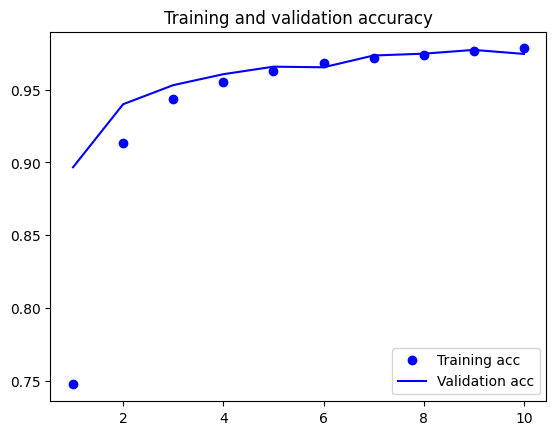

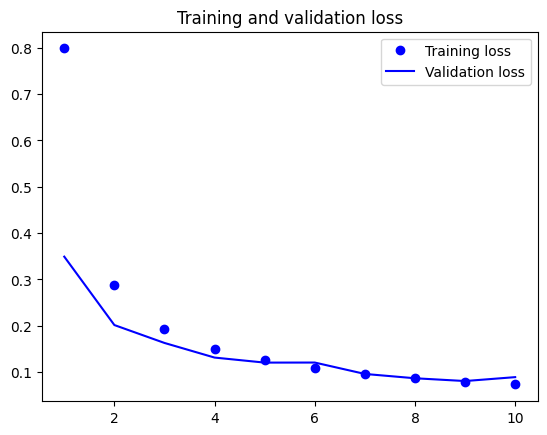

In [61]:
#plot accuracy and loss
acc= history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(1,len(acc)+1)
 
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs, val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [62]:
final_loss, final_accuracy=model.evaluate(test_data, test_labels)
print('final loss: {:.2f}%'.format(final_loss * 100))
print('final accuracy: {:.2f}%'.format(final_accuracy * 100))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9737 - loss: 0.0934
final loss: 7.95%
final accuracy: 97.71%


X_train shape: (576, 1, 65536)
y_train shape: (576,)
X_test shape: (144, 1, 65536)
y_test shape: (144,)


c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 128)            │    33,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,596,098 (128.16 MB)

 Trainable params: 33,596,098 (128.16 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 325ms/step - accuracy: 0.4433 - loss: 0.7371 - val_accuracy: 0.5139 - val_loss: 0.6925
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 282ms/step - accuracy: 0.4665 - loss: 0.7022 - val_accuracy: 0.5000 - val_loss: 0.6950
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 284ms/step - accuracy: 0.5155 - loss: 0.6971 - val_accuracy: 0.5000 - val_loss: 0.6935
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 280ms/step - accuracy: 0.4811 - loss: 0.6969 - val_accuracy: 0.5069 - val_loss: 0.6929
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 282ms/step - accuracy: 0.4824 - loss: 0.6979 - val_accuracy: 0.5069 - val_loss: 0.6910
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 282ms/step - accuracy: 0.5086 - loss: 0.6938 - val_accuracy: 0.5069 - val_loss: 0.6866
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 282ms/step - accuracy: 0.5282 - loss: 0.6962 - val_accuracy: 0.5069 - val_loss: 0.6938
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 281ms/step - accuracy: 0.5442 - loss: 0.6938 - val_accuracy: 0.

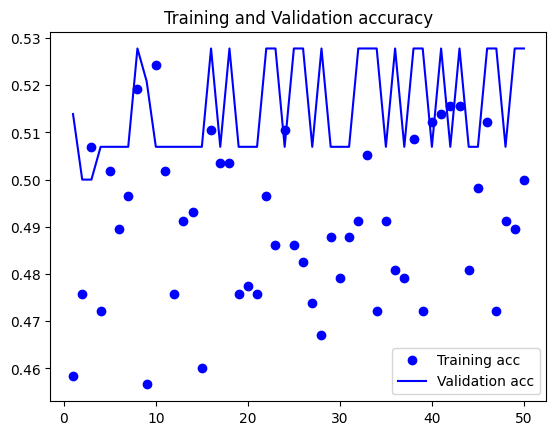

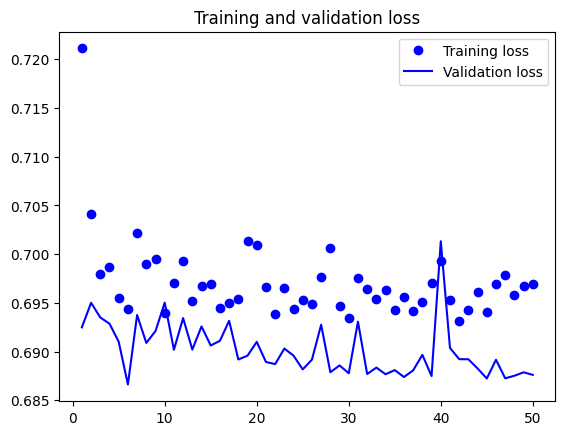

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5431 - loss: 0.6887
Final loss: 68.76%
Final Accuracy: 52.78%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


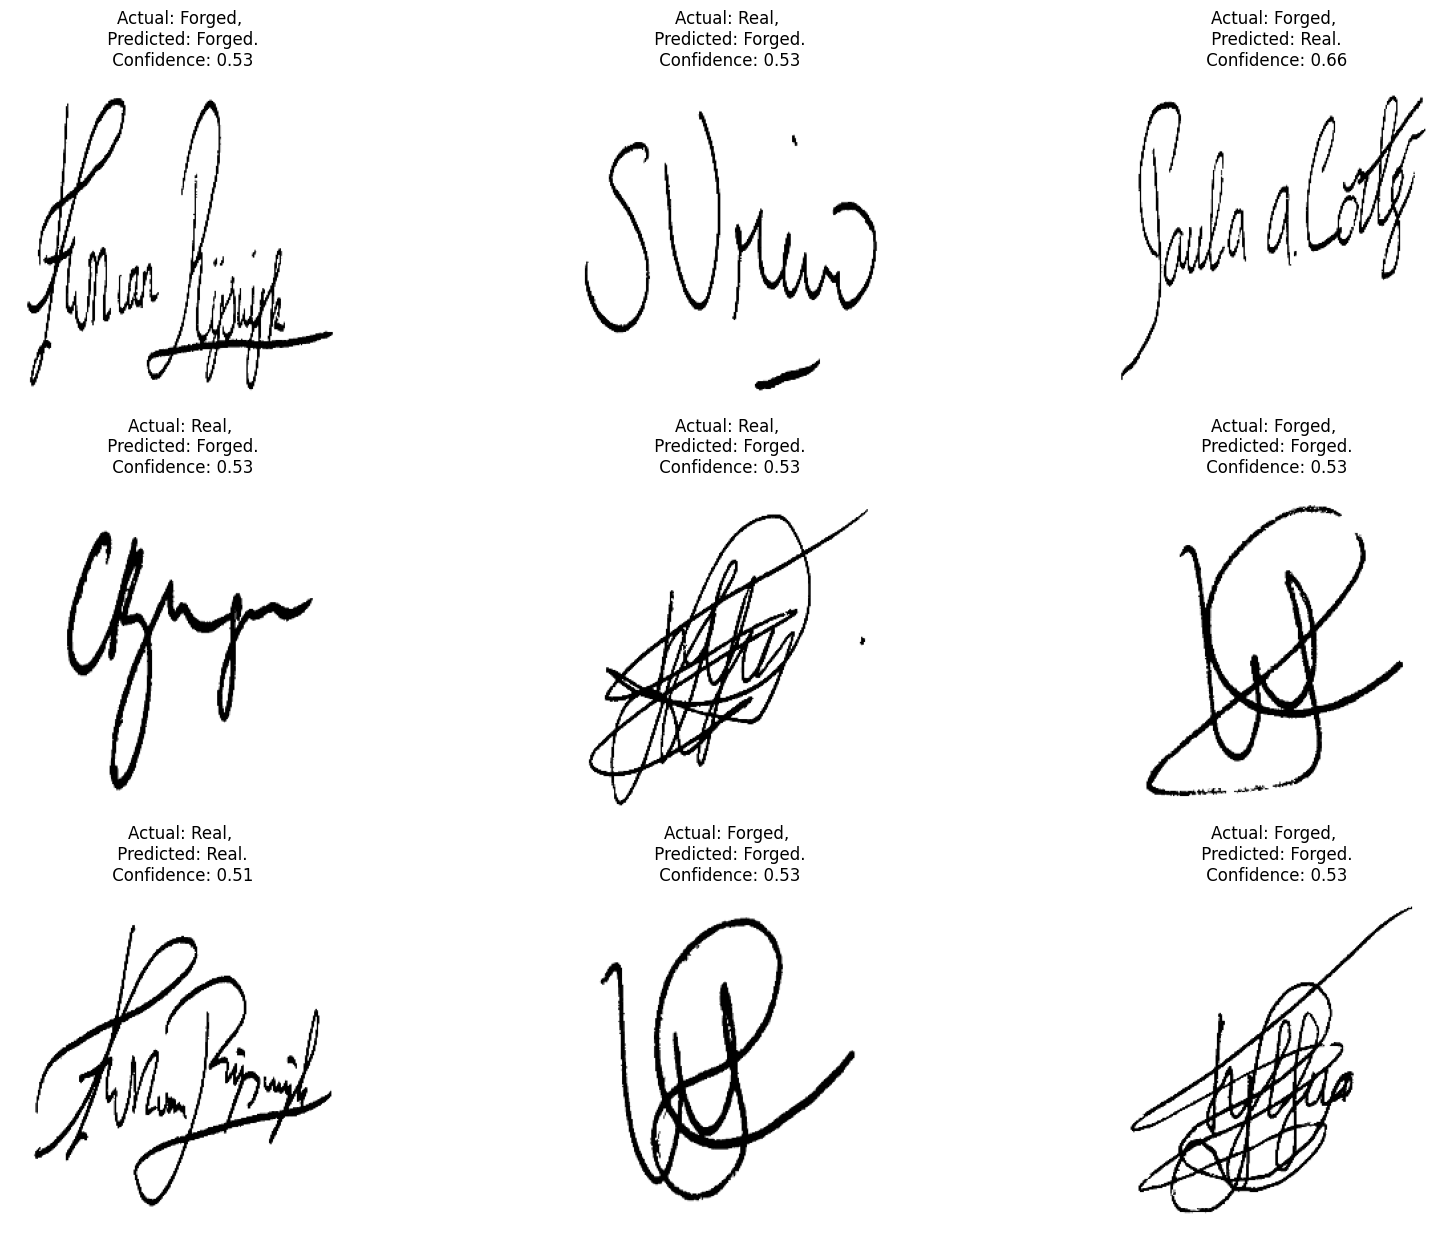

In [1]:
import cv2
import numpy as np
import glob
import os
import tensorflow as tf
from keras import activations
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional
 
 
# Load genuine signature paths
gen_sign = (glob.glob('Dataset_Signature_Final/Dataset/dataset1/real/*.*') +
            glob.glob('Dataset_Signature_Final/Dataset/dataset2/real/*.*') +
            glob.glob('Dataset_Signature_Final/Dataset/dataset3/real/*.*') +
            glob.glob('Dataset_Signature_Final/Dataset/dataset4/real/*.*'))
 
# Load forged signature paths
forg_sign = (glob.glob('Dataset_Signature_Final/Dataset/dataset1/forge/*.*') +
             glob.glob('Dataset_Signature_Final/Dataset/dataset2/forge/*.*') +
             glob.glob('Dataset_Signature_Final/Dataset/dataset3/forge/*.*') +
             glob.glob('Dataset_Signature_Final/Dataset/dataset4/forge/*.*'))
 
 
# Split the data into train and test (80% train, 20% test)
train_ratio = 0.8
train_gen_sign = gen_sign[:int(len(gen_sign) * train_ratio)]
test_gen_sign = gen_sign[int(len(gen_sign) * train_ratio):]
train_forg_sign = forg_sign[:int(len(forg_sign) * train_ratio)]
test_forg_sign = forg_sign[int(len(forg_sign) * train_ratio):]
 
train_image_paths = train_gen_sign + train_forg_sign
test_image_paths = test_gen_sign + test_forg_sign
 
 
# Preprocessing functions
def preprocess_image(image_path, img_size=(256, 256), patch_size=(256, 256)):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read in grayscale
    if img is None:
        raise ValueError(f"Failed to load image: {image_path}")
    img = cv2.resize(img, img_size)  # Resize to fixed size
    return img_to_patches(img, patch_size)
 
 
 
def img_to_patches(img, patch_size=(256, 256)):
    patches = []
    for i in range(0, img.shape[0], patch_size[0]):
        for j in range(0, img.shape[1], patch_size[1]):
            patch = img[i:i+patch_size[0], j:j+patch_size[1]].flatten()  # Flatten each  patch
            patches.append(patch)
    return np.array(patches)
 
 
# Process images and store them as sequences of patches for both train and test
def process_images(image_paths, label):
    X_data = []
    y_data = []
    for image_path in image_paths:
        try:
            patches = preprocess_image(image_path)
            X_data.append(patches)
            y_data.append(label)
        except Exception as e:
            print(f"Error processing {image_path}: {e}")
    return np.array(X_data), np.array(y_data)
 
 
# Create training dataset
X_train_real, y_train_real = process_images(train_gen_sign, label=0)  # 0 for real
X_train_forg, y_train_forg = process_images(train_forg_sign, label=1)  # 1 for forged
 
# Create test dataset
X_test_real, y_test_real = process_images(test_gen_sign, label=0)  # 0 for real
X_test_forg, y_test_forg = process_images(test_forg_sign, label=1)  # 1 for forged
 
# Combine real and forged data
X_train = np.concatenate([X_train_real, X_train_forg], axis=0)
y_train = np.concatenate([y_train_real, y_train_forg], axis=0)
 
X_test = np.concatenate([X_test_real, X_test_forg], axis=0)
y_test = np.concatenate([y_test_real, y_test_forg], axis=0)
 
# Shuffle the training data
indices = np.random.permutation(len(X_train))
X_train = X_train[indices]
y_train = y_train[indices]
 
# Shuffle the test data
test_indices = np.random.permutation(len(X_test))
X_test = X_test[test_indices]
y_test = y_test[test_indices]
 
 
# Print shapes for debugging
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
 
 
# Reshape for LSTM input (batch_size, time_steps, input_dim)
timesteps = X_train.shape[1]  # number of patches per image
features = X_train.shape[2]   # number of features per patch
 
# Convert labels to categorical
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)
 
 
model = Sequential([Bidirectional(LSTM(64, return_sequences=False), input_shape=(timesteps, features)), Dense(64, activation='relu'), Dense(2, activation='softmax')]) # 2 classes: genuine and forged])
 
 
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
 
 
# Print model summary
model.summary()
 
 
model.save('bi_rnn_signature_verfication_model.h5')
 
 
# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test))
 
 
 
import matplotlib.pyplot as plt
 
#plot accuracy and loss
acc= history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(1,len(acc)+1)
 
plt.plot(epochs, acc, 'bo',label='Training acc')
plt.plot(epochs, val_acc,'b',label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()
plt.show()
 
 
plt.plot(epochs, loss,'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
 
#get the final loss and accuracy
final_loss, final_accuracy= model.evaluate(X_test, y_test)
 
#print the results in percentage form
print('Final loss: {:.2f}%'.format(final_loss * 100))
print('Final Accuracy: {:.2f}%'.format(final_accuracy* 100))
 
 
import matplotlib.pyplot as plt
 
# Assuming X_test is a numpy array and you want to visualize the first 9 images
plt.figure(figsize=(20, 15))
 
# Loop over the first 9 images and their labels
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    image = X_test[i].reshape(256, 256)  # Reshape the patches back to the original image shape
    plt.imshow(image, cmap='gray')  # Display the image

    # Predict the class and confidence
    predicted_class = np.argmax(model.predict(np.expand_dims(X_test[i], axis=0)))  # Predict the class
    confidence = np.max(model.predict(np.expand_dims(X_test[i], axis=0)))  # Get the confidence score

    actual_class = np.argmax(y_test[i])  # Get the actual class from y_test

    class_names = ['Real', 'Forged']  # Class names
    plt.title(f'Actual: {class_names[actual_class]},\n Predicted: {class_names[predicted_class]}.\n Confidence: {confidence:.2f}')
    plt.axis('off')
 
plt.show()


In [35]:
import keras
print(keras.__version__)

3.6.0
